In [1]:
import numpy as np

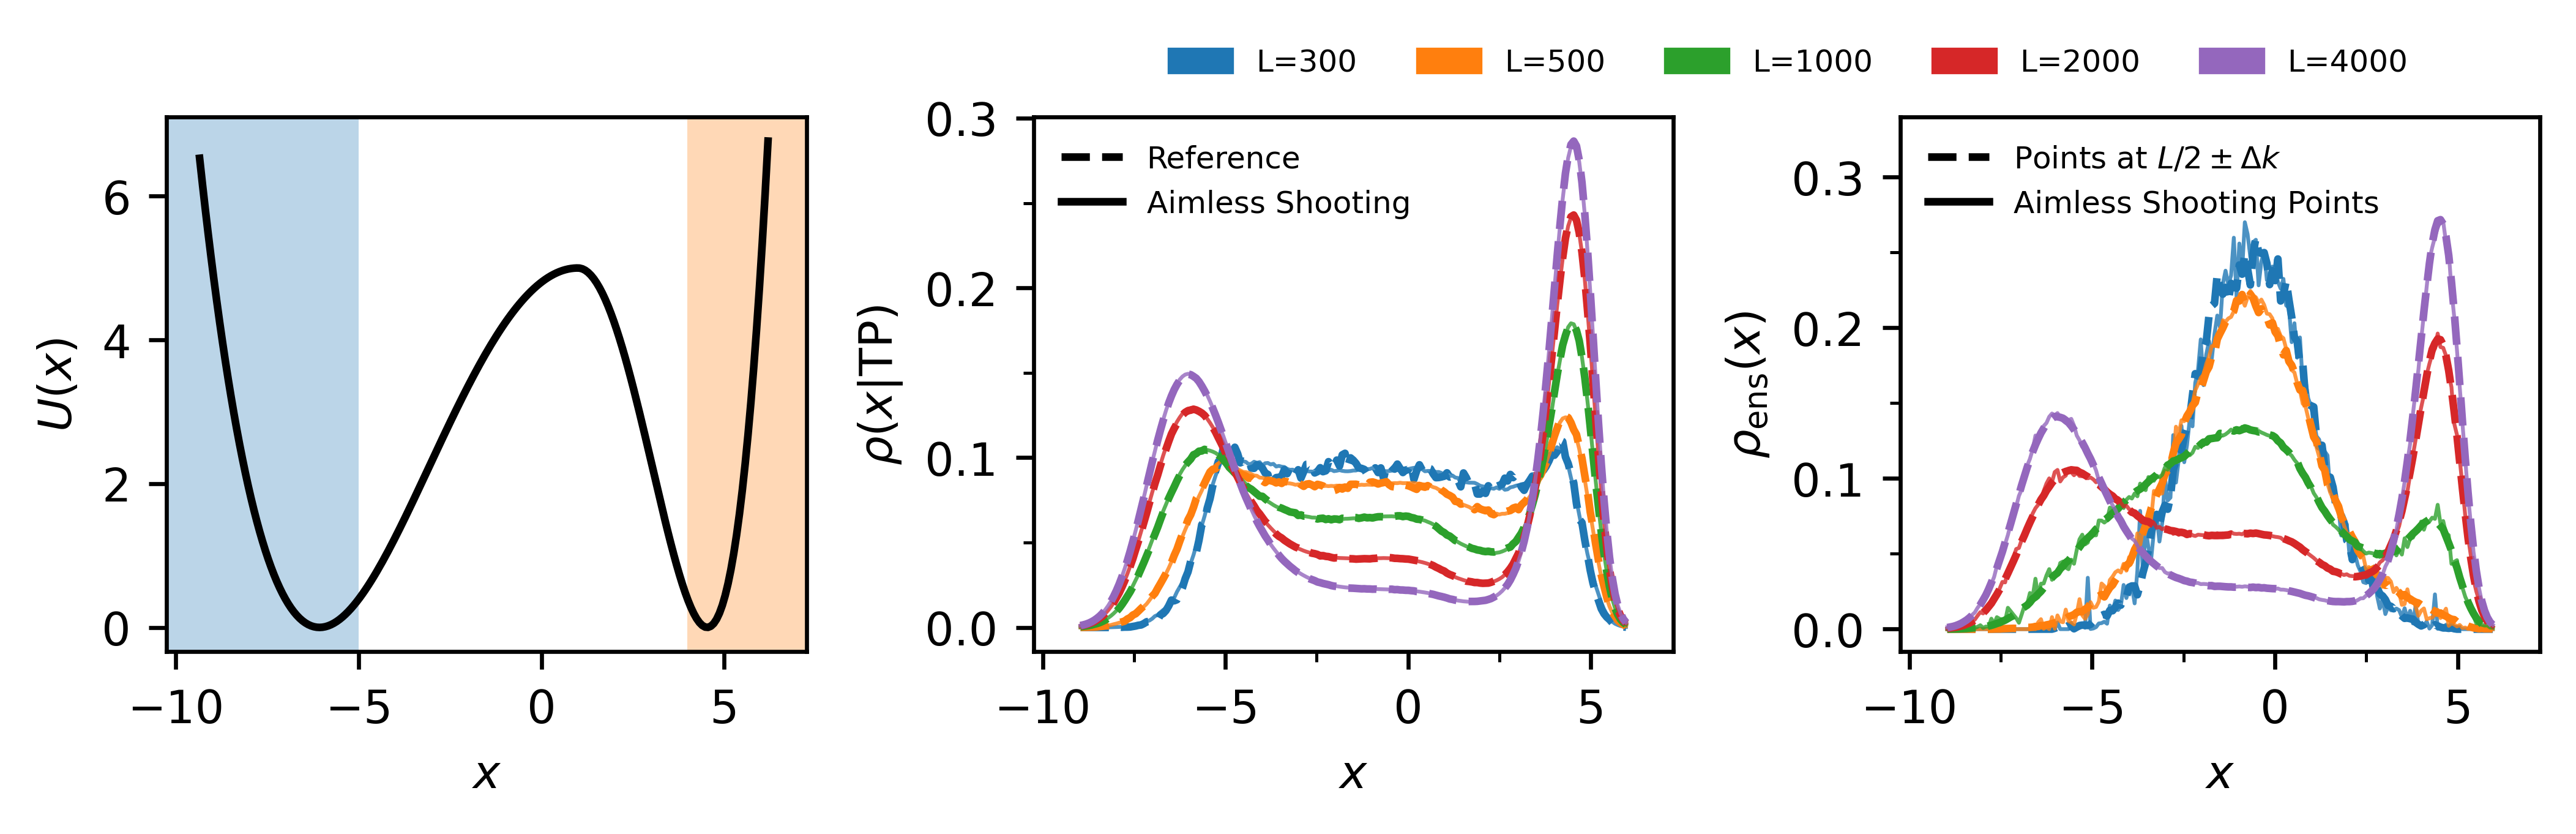

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

%matplotlib inline

mpl.rcParams.update({"font.size": 9})

fig_size = (18 * 0.393701, 5.5 * 0.393701)
fig, ax = plt.subplots(1, 3, figsize=fig_size, dpi=600)


state_bound_A = -5
state_bound_B = 4
from scripts.system import potential_energy_function

coordinates = np.linspace(-9.35, 6.2, 200)
ax[0].plot(coordinates, [potential_energy_function(x)+ 5 for x in coordinates], c="0")
ax[0].axvspan(-11, -5, color="C0", alpha=0.3, lw=0)
ax[0].axvspan(4, 8, color="C1", alpha=0.3, lw=0)
ax[0].set_xlim(-10.25, 7.25)

ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$U(x)$")

# ax[0].text(0.21,0.8, "A", transform=ax[0].transAxes, size=12, color="C0")
# ax[0].text(0.82,0.8, "B", transform=ax[0].transAxes, size=12, color="C1")


bins=np.linspace(-9, 6, 200)
xval = (bins[1:] + bins[:-1]) / 2

names = [300, 500, 1000, 2000, 4000]
labels = ["300","500","1000","2000", "4000"]

# ax[1].set_title("Distribution of Points on Paths", fontsize=8)

# peq = np.exp(-np.array([potential_energy_function(x) for x in xval]))
# peq = peq / np.sum(peq * (xval[1]-xval[0]))
# ax[1].plot(xval, peq, c="0", lw=1, label="$\\varrho(x)$")

for i,n in enumerate(names):

    eq_density_fixed = np.load(f"./data/fixed_length/equilibrium/eq_path_density_{n}.npy")
    eq_density_fixed = eq_density_fixed /  np.sum(eq_density_fixed * (xval[1]-xval[0]))
    ax[1].plot(xval, eq_density_fixed, color=f"C{i}", ls="dashed")

    density_fixed = np.load(f"./data/fixed_length/aimless/path_density_{n}.npy")
    density_fixed = density_fixed /  np.sum(density_fixed * (xval[1]-xval[0]))
    ax[1].plot(xval, density_fixed, color=f"C{i}", alpha=0.8, lw=0.75)

line1 = Line2D([0], [0], label="Reference", color="0", ls="dashed")
line2 = Line2D([0], [0], label="Aimless Shooting", color="0")

ax[1].legend(handles=[line1, line2], frameon=False, fontsize=6, ncols=1)
ax[1].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[1].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\\rho(x|$TP$)$")
ax[1].set_xlim(-10.25, 7.25)



# ax[2].set_title("Distribution of Attempted SP", fontsize=8)

for i,n in enumerate(names):

    density_fixed = np.load(f"./data/fixed_length/equilibrium/center_histogram_{n}.npy")
    density_fixed = density_fixed /  np.sum(density_fixed * (xval[1]-xval[0]))
    ax[2].plot(xval, density_fixed, color=f"C{i}", ls="dashed")

    density_fixed = np.load(f"./data/fixed_length/aimless/sp_density_{n}.npy")
    density_fixed = density_fixed /  np.sum(density_fixed * (xval[1]-xval[0]))
    ax[2].plot(xval, density_fixed, color=f"C{i}", alpha=0.8, lw=0.75)


line1 = Line2D([0], [0], label="Points at $L/2 \\pm \\Delta k$", color="0", ls="dashed")
line2 = Line2D([0], [0], label="Aimless Shooting Points", color="0")

ax[2].legend(handles=[line1, line2], frameon=False, fontsize=6, ncols=1)
ax[2].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[2].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[2].set_xlabel("$x$")
ax[2].set_ylabel("$\\rho_{\mathrm{ens}}(x)$")
ax[2].set_xlim(-10.25, 7.25)
ax[2].set_ylim(-0.015, 0.34)


plt.tight_layout()

# from matplotlib.lines import Line2D
from matplotlib.patches import Patch
h = [Patch(label="L=" + labels[i], color=f"C{i}") for i in range(len(names))]
# h = [Line2D([0], [0], lw=1, label="L=" + labels[i], color=f"C{i}") for i in range(len(names))]

ax[0].legend(handles=h, loc=(1.55,1.05), frameon=False, fontsize=6, ncols=5)

plt.savefig("figures/figure_4_raw.pdf", bbox_inches='tight', dpi=600)

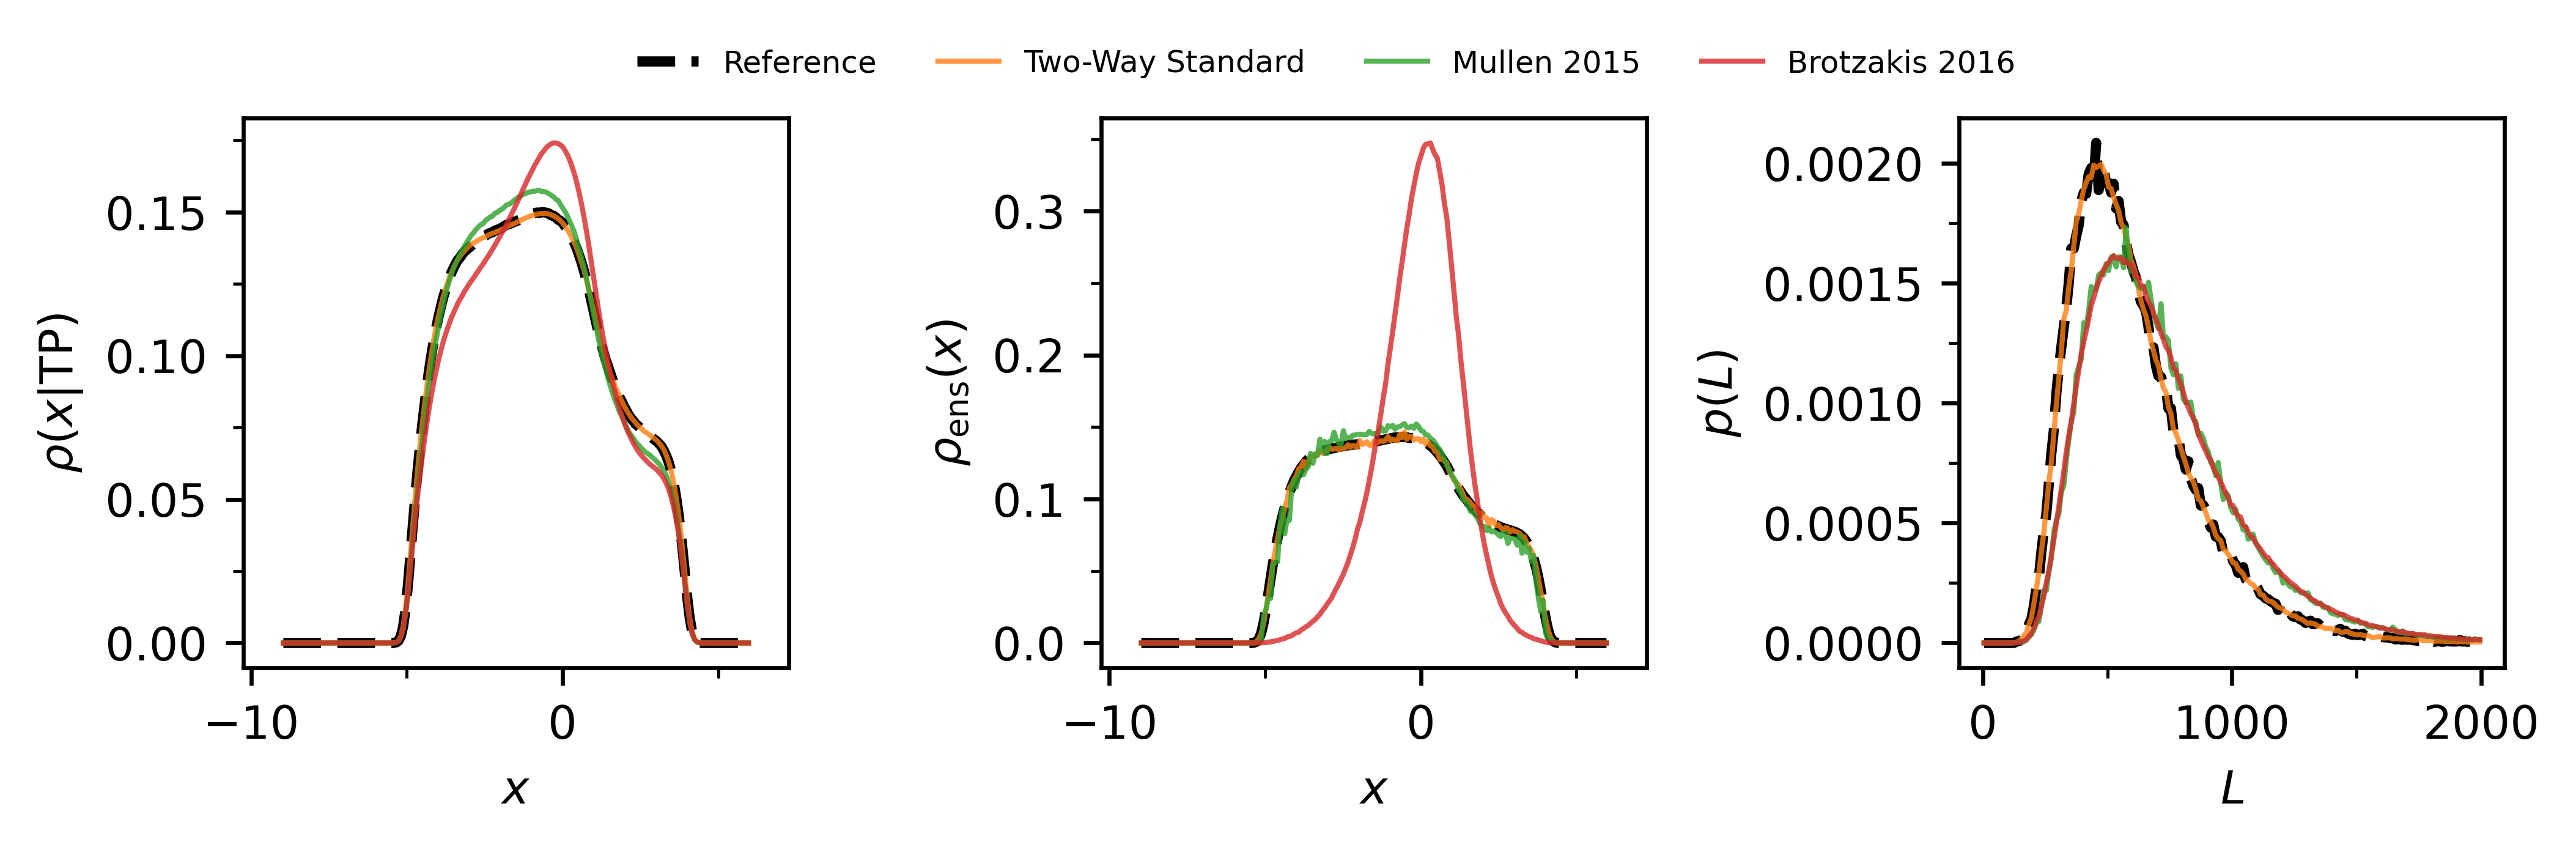

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

%matplotlib inline

mpl.rcParams.update({'font.size': 9})

fig_size = (18* 0.393701, 5.5 * 0.393701)
fig, ax = plt.subplots(1, 3, figsize=fig_size, dpi=600)

bins=np.linspace(-9, 6, 200)
xval = (bins[1:] + bins[:-1]) / 2

names = ["TPS", "mullen_2015", "brotzakis_2016"]
labels = ["Two-Way Standard", "Mullen 2015","Brotzakis 2016"]


label = "Reference"
eq_density_flexible = np.load(f"./data/flexible_length/equilibrium/eq_path_density.npy")[0]
eq_density_flexible = eq_density_flexible /  np.sum(eq_density_flexible * (xval[1]-xval[0]))
ax[0].plot(xval, eq_density_flexible, label=label, color=f"0", ls="dashed", lw=2)

for i,n in enumerate(names):

    label = labels[i]
    density_flexible = np.load(f"./data/flexible_length/{n}/path_density.npy")
    density_flexible = density_flexible /  np.sum(density_flexible * (xval[1]-xval[0]))
    ax[0].plot(xval, density_flexible, label=label, color=f"C{i+1}", alpha=0.8, lw=1.0)


ax[0].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$\\rho(x|$TP$)$")
ax[0].set_xlim(-10.25, 7.25)




label = "Reference"
eq_density_flexible = np.load(f"./data/flexible_length/equilibrium/eq_path_density.npy")[1]
eq_density_flexible = eq_density_flexible /  np.sum(eq_density_flexible * (xval[1]-xval[0]))
ax[1].plot(xval, eq_density_flexible, label=label, color=f"0", ls="dashed", lw=2)

for i,n in enumerate(names):

    label = labels[i]
    density_flexible = np.load(f"./data/flexible_length/{n}/sp_density.npy")
    density_flexible = density_flexible /  np.sum(density_flexible * (xval[1]-xval[0]))
    ax[1].plot(xval, density_flexible, label=label, color=f"C{i+1}", alpha=0.8, lw=1.0)


ax[1].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[1].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\\rho_{\mathrm{ens}}(x)$")
ax[1].set_xlim(-10.25, 7.25)




bins=np.linspace(0, 2000, 201)
xval = (bins[1:] + bins[:-1]) / 2

label = "Reference"
eq_density_flexible = np.load(f"./data/flexible_length/equilibrium/length_histogram.npy")
eq_density_flexible = eq_density_flexible /  np.sum(eq_density_flexible * (xval[1]-xval[0]))
ax[2].plot(xval, eq_density_flexible, label=label, color=f"0", ls="dashed", lw=2)

for i,n in enumerate(names):

    label = labels[i]
    density_flexible = np.load(f"./data/flexible_length/{n}/length_histogram.npy")
    density_flexible = density_flexible /  np.sum(density_flexible * (xval[1]-xval[0]))
    ax[2].plot(xval, density_flexible, label=label, color=f"C{i+1}", alpha=0.8, lw=1.0)


ax[2].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[2].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[2].set_xlabel("$L$")
ax[2].set_ylabel("$p(L)$")

plt.tight_layout()

ax[0].legend(frameon=False, loc=(0.70, 1.05), fontsize=6, ncols=4)
plt.savefig("figures/figure_5A_raw.pdf", bbox_inches='tight', dpi=600)

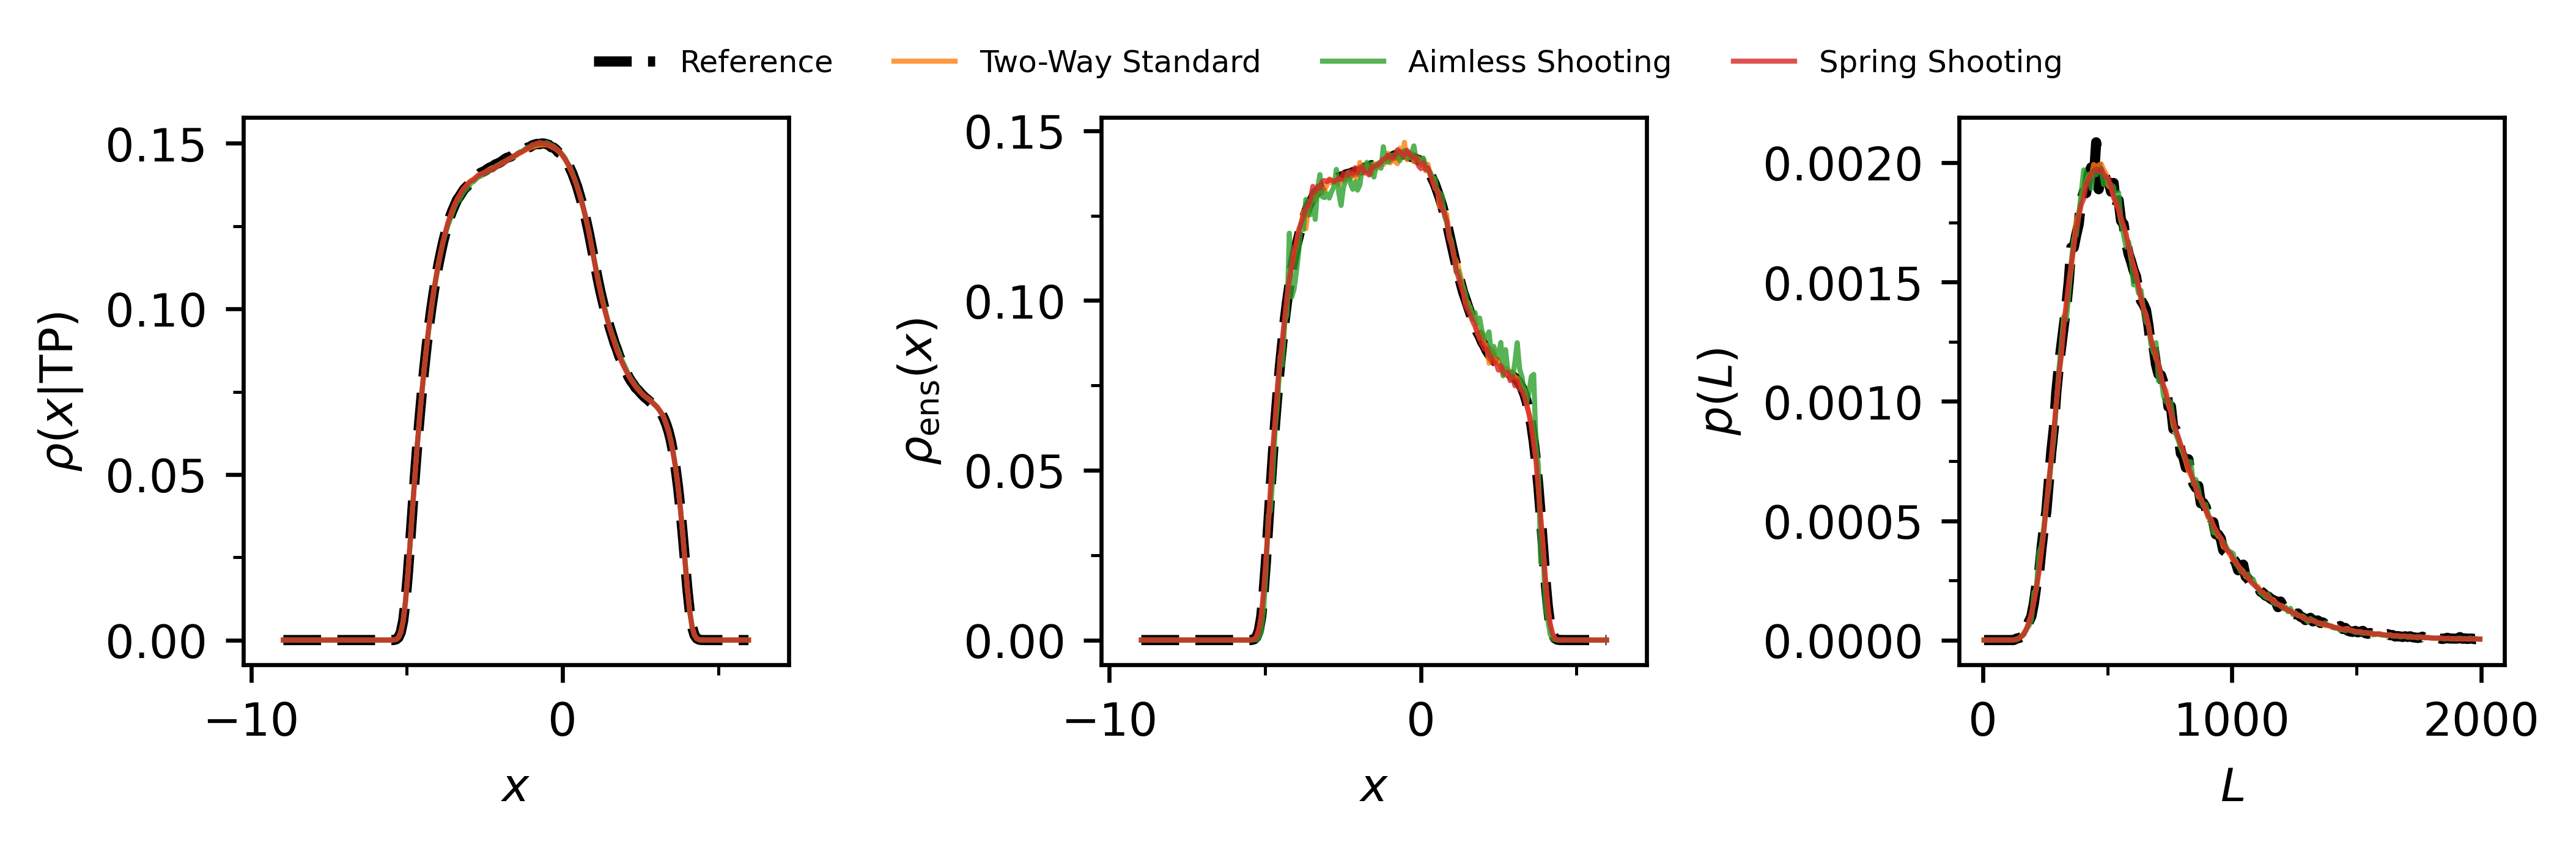

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

%matplotlib inline

mpl.rcParams.update({'font.size': 9})

fig_size = (18* 0.393701, 5.5 * 0.393701)
fig, ax = plt.subplots(1, 3, figsize=fig_size, dpi=600)

bins=np.linspace(-9, 6, 200)
xval = (bins[1:] + bins[:-1]) / 2

names = ["TPS", "aimless", "spring"]
labels = ["Two-Way Standard", "Aimless Shooting","Spring Shooting"]


label = "Reference"
eq_density_flexible = np.load(f"./data/flexible_length/equilibrium/eq_path_density.npy")[0]
eq_density_flexible = eq_density_flexible /  np.sum(eq_density_flexible * (xval[1]-xval[0]))
ax[0].plot(xval, eq_density_flexible, label=label, color=f"0", ls="dashed", lw=2)

for i,n in enumerate(names):

    label = labels[i]
    density_flexible = np.load(f"./data/flexible_length/{n}/path_density.npy")
    density_flexible = density_flexible /  np.sum(density_flexible * (xval[1]-xval[0]))
    ax[0].plot(xval, density_flexible, label=label, color=f"C{i+1}", alpha=0.8, lw=1.0)


ax[0].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$\\rho(x|$TP$)$")
ax[0].set_xlim(-10.25, 7.25)



label = "Reference"
eq_density_flexible = np.load(f"./data/flexible_length/equilibrium/eq_path_density.npy")[1]
eq_density_flexible = eq_density_flexible /  np.sum(eq_density_flexible * (xval[1]-xval[0]))
ax[1].plot(xval, eq_density_flexible, label=label, color=f"0", ls="dashed", lw=2)

for i,n in enumerate(names):

    label = labels[i]
    density_flexible = np.load(f"./data/flexible_length/{n}/sp_density.npy")
    density_flexible = density_flexible /  np.sum(density_flexible * (xval[1]-xval[0]))
    ax[1].plot(xval, density_flexible, label=label, color=f"C{i+1}", alpha=0.8, lw=1.0)


ax[1].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[1].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\\rho_{\mathrm{ens}}(x)$")
ax[1].set_xlim(-10.25, 7.25)



bins=np.linspace(0, 2000, 201)
xval = (bins[1:] + bins[:-1]) / 2

label = "Reference"
eq_density_flexible = np.load(f"./data/flexible_length/equilibrium/length_histogram.npy")
eq_density_flexible = eq_density_flexible /  np.sum(eq_density_flexible * (xval[1]-xval[0]))
ax[2].plot(xval, eq_density_flexible, label=label, color=f"0", ls="dashed", lw=2)

for i,n in enumerate(names):

    label = labels[i]
    density_flexible = np.load(f"./data/flexible_length/{n}/length_histogram.npy")
    density_flexible = density_flexible /  np.sum(density_flexible * (xval[1]-xval[0]))
    ax[2].plot(xval, density_flexible, label=label, color=f"C{i+1}", alpha=0.8, lw=1.0)


ax[2].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[2].yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax[2].set_xlabel("$L$")
ax[2].set_ylabel("$p(L)$")

plt.tight_layout()

ax[0].legend(frameon=False, loc=(0.62, 1.05), fontsize=6, ncols=4)
plt.savefig("figures/figure_5B_raw.pdf", bbox_inches='tight', dpi=600)